>> top 5 <<
[('코로나', 8), ('이은해', 7), ('영리병원', 5), ('재유행', 5), ('진료', 4)]
['코로나', '이은해', '영리병원', '재유행', '진료']
[8, 7, 5, 5, 4]
원형 그래프


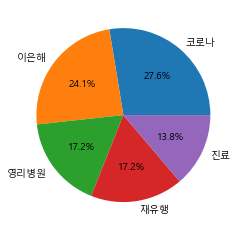

('남친', 3)
('의문사', 4)
('이은해', 9)
('내사', 3)
('경찰', 4)
('영상', 4)
('흉기난동', 3)
('활용', 3)
('입법예고', 3)
('서울시', 3)
('차기', 3)
('검찰총장', 3)
('조남관', 4)
('법알못', 4)
('문재인', 3)
('보도', 3)
('기사', 4)
('여자', 3)
('윤석열', 3)
('모음', 3)
('영리병원', 5)
('진료', 4)
('내국인', 4)
('재유행', 5)
('코로나', 8)
('검토', 3)
('최저임금', 4)
('삭제', 3)
('경찰', 3)
('층간소음', 3)
('흉기난동', 3)
('시범사업', 3)
('선정', 3)
('서비스', 3)
('조남관', 4)
('식목일', 3)
('중단', 4)
('환자', 3)
('만원', 3)
('이은해', 7)
('여자', 3)
('보도', 3)
('기사', 4)
('모음', 3)


In [115]:
import urllib.request
from bs4 import BeautifulSoup
import re

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
res = urllib.request.urlopen(url)
data = res.read()
src = data.decode('euc-kr')
html = BeautifulSoup(src,'html.parser')
atags = html.select('a')
# for a in atags:
#     print(a.string)
    
crawling_data = []
i=0
for a in atags:
    if a.string:
        # print(f"li tag내용[{i}]: ",li.string.strip())
        crawling_data.append(a.string.strip())
    i+=1
# print(crawling_data)

def clean_text(text_str):
    # 문장부호 제거
    text_str_re = re.sub(
        '[,.?!:\'\"\[\]]',
        '',
        text_str
        )
    # 특수문자, 숫자 제거
    text_str_re = re.sub(
        '[!@#$%^&*()]|[0-9]',
        '',
        text_str_re)
    # 영문 소문자 -> 영문제거
    text_str_re = text_str_re.lower()
    text_str_re = re.sub('[a-z]','',text_str_re)
    # 공백 제거
    text_str_re = ' '.join(text_str_re.split())
    
    return text_str_re

clean_texts = [clean_text(row) for row in crawling_data]

word_count = {}

for text in clean_texts:        # 텍스트 -> 문장
    for word in text.split():    # 문장 -> 단어
        word_count[word] = word_count.get(word,0) + 1
# print(word_count)

new_word_count = {}
for word,cnt in word_count.items():
    if cnt >= 3 and len(word) >=2 and len(word) < 5:
        new_word_count[word] = new_word_count.get(word,cnt)

# print(new_word_count)

from collections import Counter     # 모듈을 추가

counter = Counter(new_word_count)
top5_word = counter.most_common(5)  # Top 5
print(">> top 5 <<")
print(top5_word)

words = []       # 단어
counts = []     # 출현 빈도수

for word,count in top5_word:
    words.append(word) 
    counts.append(count)
print(words)
print(counts)

import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(
    fname="C:\Windows\Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

print('원형 그래프')
plt.pie(counts,labels=words,autopct='%.1f%%')
plt.show()

import sqlite3

try:
    # DB 연동
    conn = sqlite3.connect('data/word_count')    # DB생성 -> 연결
    # sql 실행객체
    cursor = conn.cursor()
    # table 생성
    sql = 'create table if not exists words (word text(10), count Integer)'
    # 실행
    cursor.execute(sql)
    ## 레코드 추가
    for i in new_word_count:
        cursor.execute("insert into words values ('{}','{}')".format(i,new_word_count[i]))
    conn.commit()   # DB반영
    
    ## 레코드 조회
    cursor.execute("select * from words")
    rows = cursor.fetchall()    # 조회 레코드 읽기
    # 출력
    for row in rows:
        print(row)

except Exception as e:
    print("DB연동 에러 : ",e)
    conn.rollback()
finally:
    cursor.close()
    conn.close()